# Libraries

In [1]:
%pip install MetaTrader5

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install mplfinance
%pip install datetime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplfinance as mpf
from datetime import datetime, timedelta

# Import data

                 time     open     high      low    close  tick_volume  \
0 2025-03-17 13:30:00  3000.30  3001.19  2996.61  2997.39         1508   
1 2025-03-17 14:00:00  2997.44  2997.86  2985.03  2992.62         2037   
2 2025-03-17 14:30:00  2993.28  2994.09  2984.80  2987.17         2146   
3 2025-03-17 15:00:00  2987.18  2990.67  2986.04  2987.35         2098   
4 2025-03-17 15:30:00  2987.38  2991.40  2986.23  2988.35         2302   

   spread  real_volume  
0       6            0  
1       5            0  
2      10            0  
3      13            0  
4       5            0  


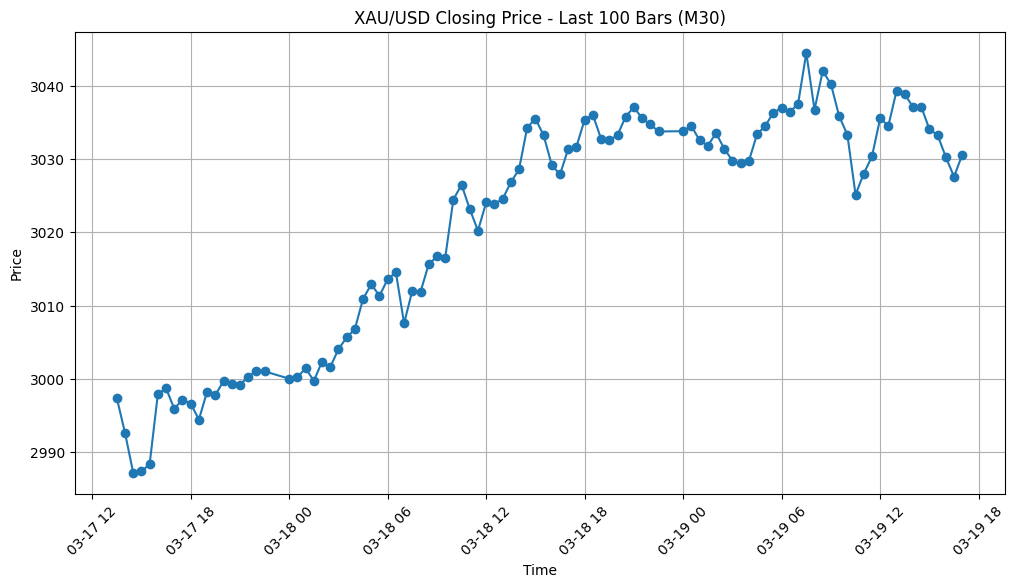

True

In [ ]:
if not mt5.initialize():
    print("Failed to initialize MT5")
    mt5.shutdown()

symbol = "XAUUSD"
rates = mt5.copy_rates_from_pos(symbol, mt5.TIMEFRAME_M30, 0, 100)

df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert timestamp

print(df.head())

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close'], marker='o', linestyle='-')
plt.title("XAU/USD Closing Price - Last 100 Bars (M30)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()

mt5.shutdown()


In [ ]:
if not mt5.initialize():
    print("MT5 Initialization Failed")
    mt5.shutdown()

symbol = "XAUUSD"

years_back = 25
start_time = datetime.now() - timedelta(days=years_back * 365)

timeframes = {
    "4H": mt5.TIMEFRAME_H4,
    "1H": mt5.TIMEFRAME_H1,
    "1D": mt5.TIMEFRAME_D1
}

for tf_name, tf in timeframes.items():
    print(f"Fetching {tf_name} data for {symbol}...")

    rates = mt5.copy_rates_range(symbol, tf, start_time, datetime.now())

    if rates is None or len(rates) == 0:
        print(f"Failed to get {tf_name} data")
        continue

    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert timestamp

    filename = f"{symbol}_{tf_name}_25years.csv"
    df.to_csv(filename, index=False)
    print(f"Saved {tf_name} data to {filename}")

mt5.shutdown()
print("Data retrieval complete.")

Fetching 4H data for XAUUSD...
Saved 4H data to XAUUSD_4H_25years.csv
Fetching 1H data for XAUUSD...
Failed to get 1H data
Fetching 1D data for XAUUSD...
Saved 1D data to XAUUSD_1D_25years.csv
Data retrieval complete.


Gagal mendapatkan informasi harga `1D` untuk 25 tahun terakhir

In [5]:
df_4H = pd.read_csv("XAUUSD_4H_25years.csv")
df_1D = pd.read_csv("XAUUSD_1D_25years.csv")

In [6]:
## columns to list
print(df_4H.columns.tolist())

['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']


In [7]:
df_4H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31795 entries, 0 to 31794
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         31795 non-null  object 
 1   open         31795 non-null  float64
 2   high         31795 non-null  float64
 3   low          31795 non-null  float64
 4   close        31795 non-null  float64
 5   tick_volume  31795 non-null  int64  
 6   spread       31795 non-null  int64  
 7   real_volume  31795 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.9+ MB


In [8]:
df_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         5335 non-null   object 
 1   open         5335 non-null   float64
 2   high         5335 non-null   float64
 3   low          5335 non-null   float64
 4   close        5335 non-null   float64
 5   tick_volume  5335 non-null   int64  
 6   spread       5335 non-null   int64  
 7   real_volume  5335 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 333.6+ KB


## 1. Kolom Utama
- **`time`**  
  - Waktu candlestick dibuka dalam format UNIX timestamp.  
  - Contoh: `1700000000` → Perlu dikonversi ke datetime.  
  - **Fungsi:** Digunakan sebagai indeks waktu dalam analisis.

- **`open`**  
  - Harga pembukaan dari candlestick di timeframe tertentu.  
  - Contoh: `1923.45`  
  - **Fungsi:** Berguna untuk analisis pola harga dan tren pasar.

- **`high`**  
  - Harga tertinggi yang dicapai dalam periode candlestick.  
  - Contoh: `1927.89`  
  - **Fungsi:** Digunakan untuk menghitung volatilitas dan menentukan resistance.

- **`low`**  
  - Harga terendah dalam periode candlestick.  
  - Contoh: `1919.32`  
  - **Fungsi:** Berguna untuk menentukan support dan mengukur volatilitas.

- **`close`**  
  - Harga penutupan dari candlestick.  
  - Contoh: `1925.67`  
  - **Fungsi:** Data utama untuk analisis teknikal dan model prediksi harga.

## 2. Kolom Tambahan
- **`tick_volume`**  
  - Jumlah perubahan harga (ticks) dalam satu candlestick.  
  - Contoh: `1234` → Ada **1234** perubahan harga selama periode tersebut.  
  - **Fungsi:** Mengukur likuiditas pasar.

- **`spread`**  
  - Selisih antara harga Bid dan Ask saat candlestick ditutup.  
  - Contoh: `15` → Spread 15 pips.  
  - **Fungsi:** Indikator biaya transaksi dan kondisi pasar.

- **`real_volume`**  
  - Volume aktual transaksi (tersedia di broker tertentu).  
  - Contoh: `50000` → Total 50.000 unit XAU/USD diperdagangkan.  
  - **Fungsi:** Melihat kekuatan pasar dan partisipasi trader.

---

In [9]:
df_4H.describe()

,open,high,low,close,tick_volume,spread,real_volume
count,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,3.179500e+04
mean,1334.313672,1337.926375,1330.576395,1334.356596,12944.259726,14.251958,2.881515e+06
std,515.768285,516.973014,514.540242,515.828638,14130.727222,16.971445,9.047044e+06
min,382.300000,383.100000,381.100000,382.000000,1.000000,0.000000,0.000000e+00
25%,1003.265000,1006.825000,999.240000,1003.430000,2919.500000,0.000000,0.000000e+00
50%,1291.470000,1293.800000,1288.670000,1291.440000,9668.000000,5.000000,0.000000e+00
75%,1714.975000,1720.095000,1710.100000,1714.910000,17967.000000,24.000000,2.681587e+06
max,3044.510000,3045.320000,3032.450000,3044.500000,249196.000000,252.000000,2.984248e+08


In [10]:
df_1D.describe()

,open,high,low,close,tick_volume,spread,real_volume
count,5335.000000,5335.000000,5335.000000,5335.000000,5335.000000,5335.000000,5.335000e+03
mean,1331.530304,1341.238167,1321.656971,1331.783389,77144.976570,12.371134,1.717297e+07
std,516.405345,519.692041,513.320037,516.747233,65036.048565,15.374388,4.813231e+07
min,382.800000,384.800000,381.100000,382.800000,2.000000,0.000000,0.000000e+00
25%,994.310000,1001.045000,985.620000,993.485000,24189.000000,0.000000,0.000000e+00
50%,1290.910000,1296.770000,1282.630000,1290.930000,70981.000000,5.000000,0.000000e+00
75%,1714.050000,1726.065000,1702.075000,1713.630000,111407.000000,24.000000,2.738045e+07
max,3033.980000,3045.320000,3022.890000,3033.760000,679039.000000,100.000000,8.852824e+08


In [ ]:
missing_1D = df_1D.isnull().sum()
missing_4H = df_4H.isnull().sum()

duplicates_1D = df_1D.duplicated().sum()
duplicates_4H = df_4H.duplicated().sum()

missing_values = pd.DataFrame({
    "Timeframe": ["1D", "4H"],
    "Missing Values": [missing_1D.sum(), missing_4H.sum()],
    "Duplicate Rows": [duplicates_1D, duplicates_4H]
})

missing_values

,Timeframe,Missing Values,Duplicate Rows
0,1D,0,0
1,4H,0,0


Tidak terdapat missing values ataupun data duplikat

# Exploratory Data Analysis

## 1. Pergerakan harga XAU/USD sejak tahun 2004

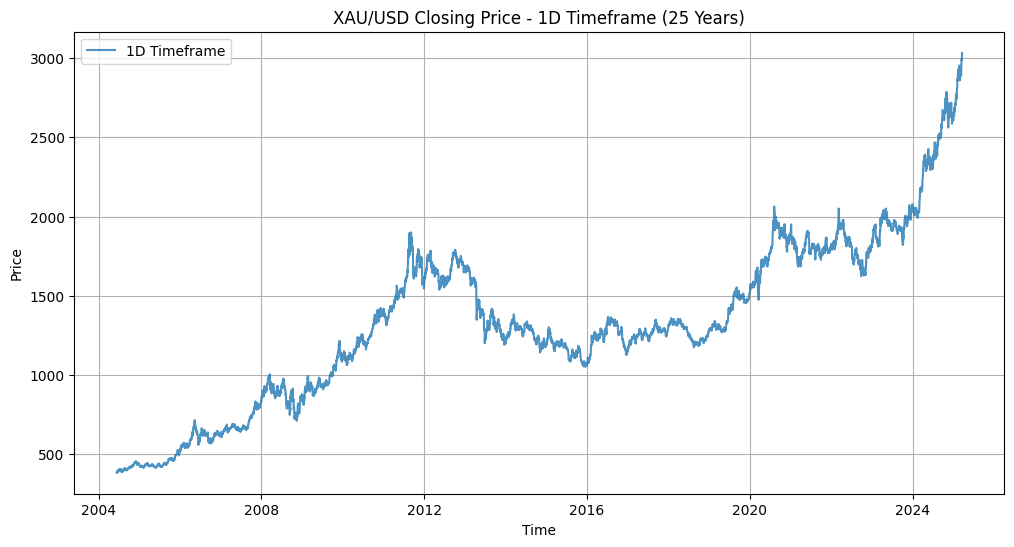

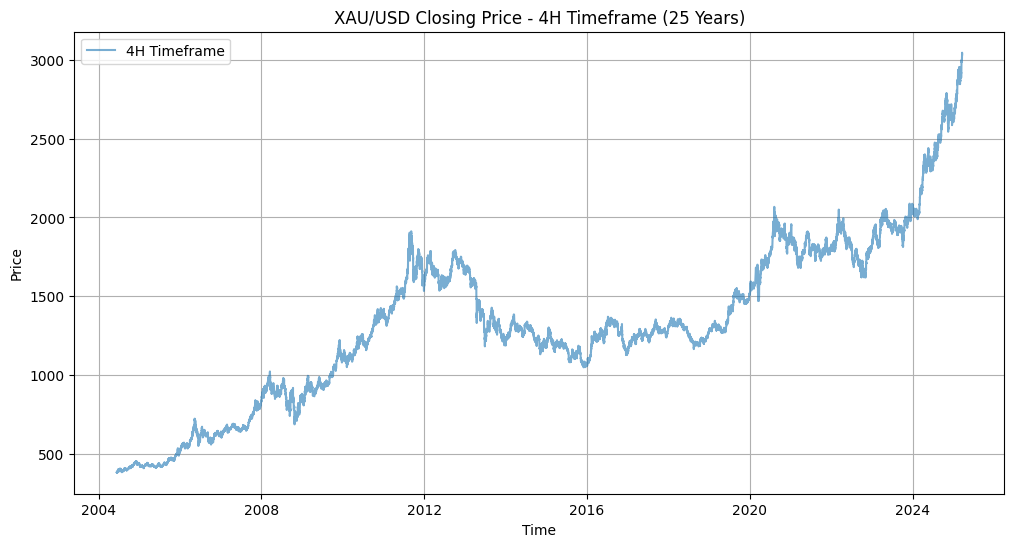

In [ ]:
df_1D['time'] = pd.to_datetime(df_1D['time'])
df_4H['time'] = pd.to_datetime(df_4H['time'])

plt.figure(figsize=(12, 6))
plt.plot(df_1D['time'], df_1D['close'], label='1D Timeframe', alpha=0.8)
plt.title("XAU/USD Closing Price - 1D Timeframe (25 Years)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_4H['time'], df_4H['close'], label='4H Timeframe', alpha=0.6)
plt.title("XAU/USD Closing Price - 4H Timeframe (25 Years)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

## 2. Simple Moving Averages (SMA) dan Exponential Moving Average (EMA)

- Penjelasan singkat

### 📌 SMA & EMA: Cara Simpel Memahami Tren Harga

#### 🔹 **Apa Itu SMA & EMA?**
**SMA (Simple Moving Average)** dan **EMA (Exponential Moving Average)** adalah indikator yang digunakan untuk melihat tren harga dalam trading.

- **SMA** menghitung rata-rata harga dalam periode tertentu.  
  👉 Contoh: **SMA 50** berarti rata-rata harga **50 hari terakhir**.  
  👉 Semakin besar periodenya, semakin lambat SMA bereaksi terhadap perubahan harga.

- **EMA** mirip dengan SMA, tetapi lebih sensitif terhadap pergerakan harga terbaru.  
  👉 EMA lebih cepat menangkap perubahan tren dibandingkan SMA, cocok untuk **trading jangka pendek**.

---

#### 🔹 **Bagaimana SMA & EMA Digunakan dalam Trading?**
✅ **Golden Cross** → Ketika **SMA 50 melintasi SMA 200 ke atas**, menandakan tren **bullish** (harga cenderung naik).  
✅ **Death Cross** → Ketika **SMA 50 melintasi SMA 200 ke bawah**, menandakan tren **bearish** (harga cenderung turun).  
✅ **SMA 200 sebagai support/resistance** →  
   - Jika harga menyentuh **SMA 200 lalu memantul ke atas**, itu tanda **support kuat**.  
   - Jika harga menembus **SMA 200 ke bawah**, bisa jadi sinyal **bearish lanjutan**.

---

#### 🔹 **Kesimpulan**
🔹 **SMA cocok untuk melihat tren jangka panjang**, sedangkan **EMA lebih cepat menangkap perubahan tren**.  
🔹 **Golden Cross & Death Cross** bisa digunakan untuk mendeteksi peluang masuk atau keluar dari pasar.  
🔹 **SMA 200 sering digunakan sebagai batas support & resistance utama** dalam trading.  


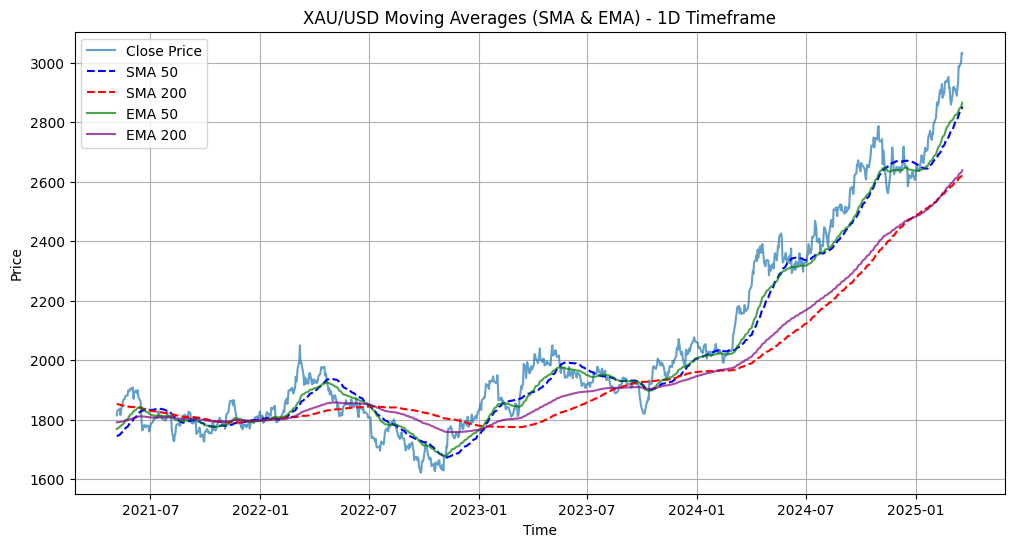

In [ ]:
df_1D['SMA_50'] = df_1D['close'].rolling(window=50).mean()
df_1D['SMA_200'] = df_1D['close'].rolling(window=200).mean()
df_1D['EMA_50'] = df_1D['close'].ewm(span=50, adjust=False).mean()
df_1D['EMA_200'] = df_1D['close'].ewm(span=200, adjust=False).mean()

df_subset = df_1D.tail(1000)

plt.figure(figsize=(12, 6))
plt.plot(df_subset['time'], df_subset['close'], label='Close Price', alpha=0.7, linestyle='-')
plt.plot(df_subset['time'], df_subset['SMA_50'], label='SMA 50', linestyle='--', color='blue')
plt.plot(df_subset['time'], df_subset['SMA_200'], label='SMA 200', linestyle='--', color='red')
plt.plot(df_subset['time'], df_subset['EMA_50'], label='EMA 50', linestyle='-', color='green', alpha=0.7)
plt.plot(df_subset['time'], df_subset['EMA_200'], label='EMA 200', linestyle='-', color='purple', alpha=0.7)

plt.title("XAU/USD Moving Averages (SMA & EMA) - 1D Timeframe")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


### 📊 Insight dari Visualisasi SMA & EMA (XAU/USD 1D Timeframe)

#### 1️⃣ **Konfirmasi Tren Bullish di Tahun Terakhir**
- Harga **secara konsisten berada di atas SMA 200 (garis merah putus-putus)** sejak awal 2023.
- **EMA 50 (garis hijau) dan SMA 50 (garis biru putus-putus) berada di atas SMA 200**, mengonfirmasi tren naik yang kuat.

#### 2️⃣ **Golden Cross Terjadi di Awal 2023**
- **SMA 50 melintasi SMA 200 ke atas** sekitar awal 2023, menandakan **Golden Cross (sinyal bullish yang kuat)**.
- Setelah Golden Cross, harga terus naik hingga level tertinggi di 2025.

#### 3️⃣ **EMA Lebih Cepat Menangkap Perubahan Tren**
- **EMA 50 (garis hijau) lebih cepat merespons perubahan harga dibandingkan SMA 50**, menunjukkan bahwa harga memiliki volatilitas yang tinggi.
- **EMA 200 (garis ungu) mulai mengikuti pergerakan harga lebih cepat dibandingkan SMA 200**, yang mengonfirmasi tren naik lebih awal.

#### 4️⃣ **Potensi Support di SMA 200**
- Setiap kali harga turun mendekati **SMA 200 (garis merah putus-putus)**, harga mengalami pantulan ke atas.
- Ini menunjukkan bahwa **SMA 200 bertindak sebagai level support dinamis** yang kuat.

#### 5️⃣ **Periode Konsolidasi di 2022**
- Sebelum Golden Cross terjadi, **harga sempat bergerak sideways di antara SMA 50 dan SMA 200**.
- Ini menunjukkan bahwa pasar mengalami fase akumulasi sebelum akhirnya mengalami breakout bullish.

---

#### 🔥 **Kesimpulan & Potensi Strategi**
✅ **Harga masih dalam tren naik**, selama tetap di atas **SMA 200**.  
✅ **Jika harga kembali ke SMA 200 dan memantul**, bisa jadi peluang **buy on dip**.  
✅ **Jika EMA 50 mulai turun dan mendekati SMA 200**, kita harus waspada terhadap **potensi reversal bearish**.  


## 3. Bollinger Bands

**Bollinger Bands** adalah indikator dalam trading yang digunakan untuk mengukur **volatilitas harga** dan melihat apakah suatu aset sedang **overbought (terlalu mahal)** atau **oversold (terlalu murah)**.

### 🔹 **Komponen Bollinger Bands**
1. **Middle Band (Garis Tengah)** → Moving Average (biasanya SMA 20).  
2. **Upper Band (Garis Atas)** → +2 standar deviasi dari moving average.  
3. **Lower Band (Garis Bawah)** → -2 standar deviasi dari moving average.

### 🔹 **Bagaimana Cara Menggunakannya?**
✅ **Jika harga mendekati Upper Band** → Aset bisa dianggap **overbought**, ada potensi koreksi turun.  
✅ **Jika harga mendekati Lower Band** → Aset bisa dianggap **oversold**, ada potensi rebound naik.  
✅ **Jika Bollinger Bands melebar** → Volatilitas tinggi, pasar sedang bergerak cepat.  
✅ **Jika Bollinger Bands menyempit** → Volatilitas rendah, pasar dalam fase konsolidasi.  

### 🔹 **Kesimpulan**
Bollinger Bands membantu kita melihat **tren harga**, **volatilitas**, dan **potensi reversal**. Ini sering digunakan dalam strategi **mean reversion** atau **breakout trading**.



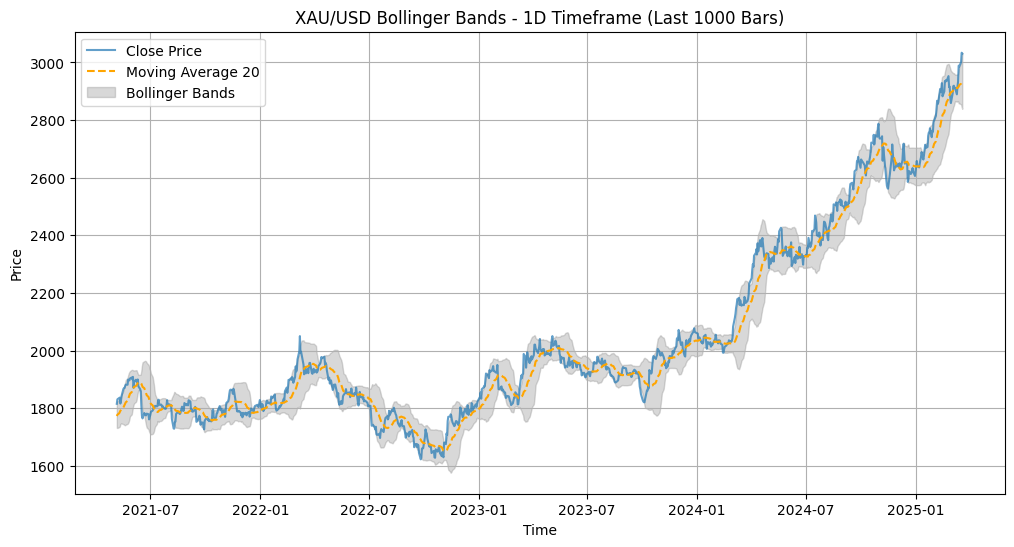

In [ ]:
df_1D['MA_20'] = df_1D['close'].rolling(window=20).mean()
df_1D['BB_upper'] = df_1D['MA_20'] + (df_1D['close'].rolling(window=20).std() * 2)
df_1D['BB_lower'] = df_1D['MA_20'] - (df_1D['close'].rolling(window=20).std() * 2)

df_subset = df_1D.tail(1000)

plt.figure(figsize=(12, 6))
plt.plot(df_subset['time'], df_subset['close'], label='Close Price', alpha=0.7)
plt.plot(df_subset['time'], df_subset['MA_20'], label='Moving Average 20', linestyle='--', color='orange')
plt.fill_between(df_subset['time'], df_subset['BB_upper'], df_subset['BB_lower'], color='gray', alpha=0.3, label="Bollinger Bands")

plt.title("XAU/USD Bollinger Bands - 1D Timeframe (Last 1000 Bars)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


Insight dari Visualisasi Bollinger Bands (XAU/USD 1D Timeframe)

### 🔹 **1️⃣ Volatilitas Harga Meningkat Seiring Tren Naik**
- Bollinger Bands **melebar** saat harga mengalami lonjakan besar, terutama setelah tahun 2023.
- Ini menunjukkan **volatilitas tinggi**, yang sering terjadi saat tren kuat atau sebelum perubahan besar di pasar.

### 🔹 **2️⃣ Konsolidasi Sebelum Breakout**
- Ada beberapa periode di mana Bollinger Bands **menyempit** (misalnya di pertengahan 2022).
- Penyempitan ini menunjukkan **fase konsolidasi**, di mana harga bergerak sideways sebelum terjadi breakout.

### 🔹 **3️⃣ Harga Sering Rebound dari Lower Band**
- Setiap kali harga mendekati **Lower Band**, harga cenderung memantul kembali ke atas.
- Ini bisa menjadi sinyal bahwa pasar sedang **oversold**, sehingga trader bisa mencari peluang **buy on dip**.

### 🔹 **4️⃣ Upper Band Sebagai Resistance**
- Harga beberapa kali mendekati **Upper Band** dan mengalami koreksi kecil sebelum naik lagi.
- Ini menunjukkan bahwa Upper Band sering berfungsi sebagai **resistance dinamis**, yang bisa menjadi area profit-taking bagi trader.

### 🔹 **5️⃣ Tren Bullish dengan Koreksi Sehat**
- Sejak awal 2023, harga terus naik dengan sesekali menyentuh Lower Band sebelum melanjutkan kenaikan.
- Ini menunjukkan **tren bullish yang kuat**, dengan koreksi yang sehat sebelum harga melanjutkan rally.

---

### 🔥 **Kesimpulan & Potensi Strategi**
✅ Jika harga menyentuh **Upper Band**, bisa jadi tanda **overbought** → Waspadai potensi koreksi.  
✅ Jika harga menyentuh **Lower Band**, bisa jadi tanda **oversold** → Peluang **buy on dip**.  
✅ Jika Bollinger Bands mulai **menyempit**, bisa jadi sinyal **pasar sedang bersiap untuk breakout**.  
✅ **Pantulan dari Lower Band** dan **breakout dari Upper Band** bisa menjadi strategi masuk yang menarik.  


## 4. Relative Strength Index (RSI)

**RSI (Relative Strength Index)** adalah indikator dalam trading yang digunakan untuk **mengukur kekuatan tren harga** dan **melihat apakah pasar sedang overbought (jenuh beli) atau oversold (jenuh jual)**.

---

### 🔹 **Bagaimana RSI Bekerja?**
- **RSI bergerak antara 0 hingga 100**.
- **Jika RSI > 70** → Pasar dianggap **overbought**, ada potensi harga akan turun.  
- **Jika RSI < 30** → Pasar dianggap **oversold**, ada potensi harga akan naik.  
- RSI biasanya dihitung berdasarkan pergerakan harga **14 periode terakhir**.

---

### 🔹 **Bagaimana Cara Menggunakannya dalam Trading?**
✅ **Ketika RSI di atas 70** → Harga mungkin akan terkoreksi turun.  
✅ **Ketika RSI di bawah 30** → Harga mungkin akan rebound naik.  
✅ **Jika RSI naik melewati 50** → Bisa menjadi sinyal bahwa tren bullish semakin kuat.  
✅ **Jika RSI turun melewati 50** → Bisa menjadi sinyal bahwa tren bearish semakin kuat.  

---

### 🔹 **Kesimpulan**
RSI membantu trader melihat **momentum harga** dan **potensi pembalikan tren**


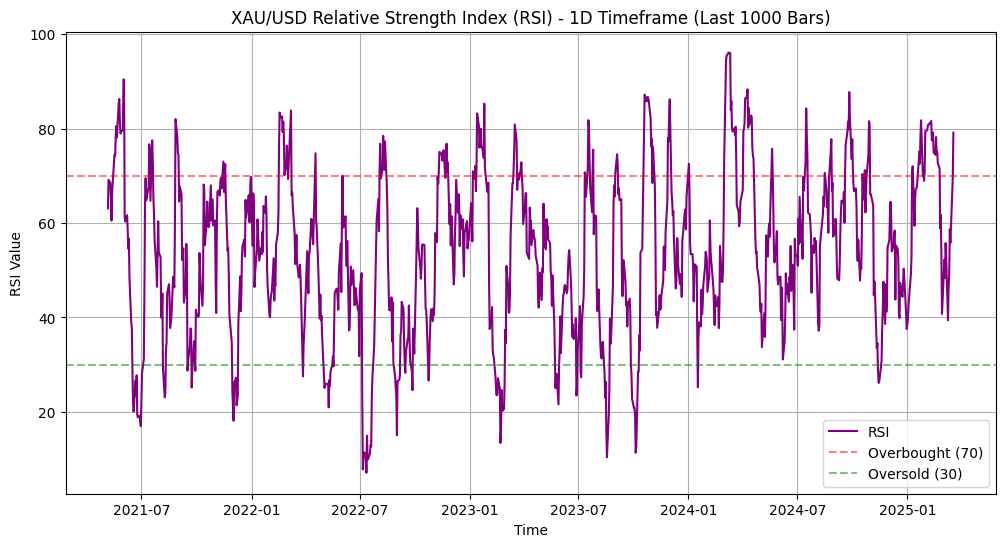

In [ ]:
window_length = 14

delta = df_1D['close'].diff()

gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=window_length, min_periods=1).mean()
avg_loss = pd.Series(loss).rolling(window=window_length, min_periods=1).mean()

rs = avg_gain / avg_loss
df_1D['RSI'] = 100 - (100 / (1 + rs))

df_subset = df_1D.tail(1000)

plt.figure(figsize=(12, 6))
plt.plot(df_subset['time'], df_subset['RSI'], label="RSI", color='purple', linestyle='-')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label="Overbought (70)")
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label="Oversold (30)")

plt.title("XAU/USD Relative Strength Index (RSI) - 1D Timeframe (Last 1000 Bars)")
plt.xlabel("Time")
plt.ylabel("RSI Value")
plt.legend()
plt.grid()
plt.show()


Insight dari Visualisasi RSI (XAU/USD 1D Timeframe)

### 🔹 **1️⃣ RSI Sering Berada di Zona Overbought & Oversold**
- RSI beberapa kali **melewati level 70** (garis merah), menandakan bahwa harga berada di **zona overbought**.  
  👉 Setelah ini, harga biasanya mengalami koreksi atau konsolidasi sebelum bergerak lebih lanjut.  
- RSI juga **turun di bawah level 30** (garis hijau) beberapa kali, yang menunjukkan **zona oversold**.  
  👉 Setelah menyentuh zona ini, harga cenderung mengalami kenaikan kembali.

### 🔹 **2️⃣ RSI Mengikuti Tren Harga dengan Volatilitas Tinggi**
- RSI mengalami **fluktuasi tajam**, mencerminkan volatilitas harga emas (XAU/USD).
- Ketika harga sedang **trending naik**, RSI lebih sering berada di level 50-70.
- Sebaliknya, ketika harga dalam **tren turun**, RSI lebih sering berada di bawah 50.

### 🔹 **3️⃣ Konfirmasi Tren dengan Level 50**
- **Ketika RSI naik melewati level 50**, sering kali harga terus naik lebih tinggi.
- **Ketika RSI turun di bawah 50**, harga cenderung mengalami pelemahan lebih lanjut.
- Level **50** bisa digunakan sebagai **batas antara tren bullish dan bearish**.

### 🔹 **4️⃣ Sinyal Potensi Reversal**
- Setiap kali RSI turun di bawah **30 (oversold)** dan kemudian kembali naik, harga biasanya mengalami **rebound**.
- Sebaliknya, setiap kali RSI naik di atas **70 (overbought)**, harga sering mengalami koreksi ke bawah.

---

### 🔥 **Kesimpulan & Potensi Strategi**
✅ **Jika RSI di atas 70**, pertimbangkan untuk **mewaspadai koreksi harga**.  
✅ **Jika RSI di bawah 30**, bisa menjadi peluang **buy on dip**.  
✅ **Level 50 dapat digunakan sebagai indikasi kekuatan tren**.  
✅ RSI bisa digunakan bersama **Bollinger Bands atau Moving Averages** untuk konfirmasi
